# He, Hg-Cd, Spare_Ar

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from astropy.nddata import Cutout2D
from astropy.io import fits
from scipy.signal import find_peaks
import itertools
import photutils

In [157]:
%matplotlib inline

# Load in Data

In [9]:
raw_arc = glob.glob("arcs.fits")[0]

In [12]:
arc_file = fits.open(raw_arc)
arc_data = arc_file[0].data.astype(float)
arc_file.close()

In [41]:
arc_spectrum = arc_data[0:-1][160]
arc_x = np.arange(0, len(arc_spectrum))

# Visualize Data

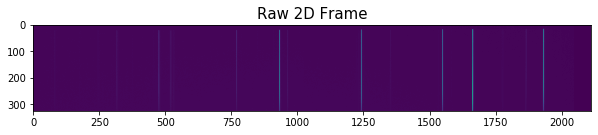

In [42]:
plt.figure(figsize=(10,10))
plt.title("Raw 2D Frame", fontsize=15)
plt.imshow(arc_data)

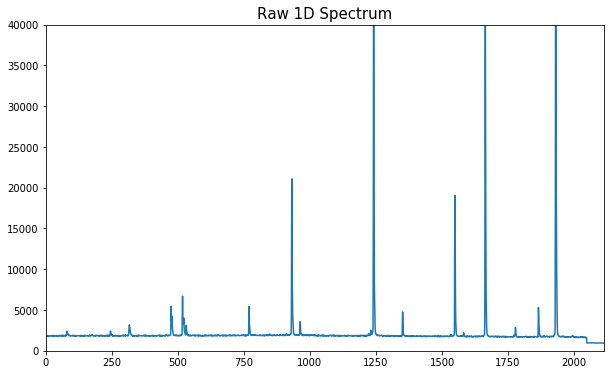

In [43]:
plt.figure(figsize = (10,6))
plt.title("Raw 1D Spectrum", fontsize=15)
plt.xlim(0,2112)
plt.ylim(0,40000)
plt.plot(arc_x, arc_spectrum)

# Find lines

In [76]:
#find peaks
line_xpos_unfilt, prop = find_peaks(arc_spectrum, height=2000, distance=10)
#filter saturated peaks
line_xpos = [xpos for xpos in line_xpos_unfilt if (arc_spectrum[xpos] < 40000)]
line_vals = arc_spectrum[line_xpos]

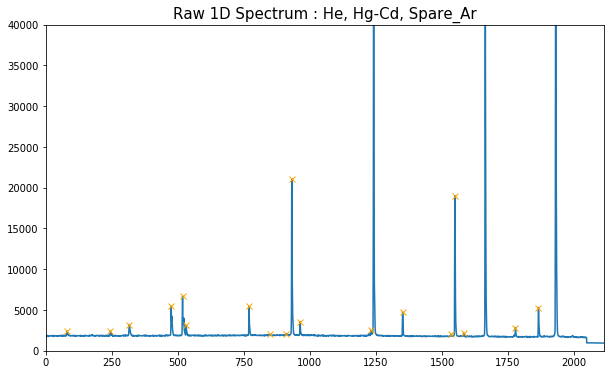

In [77]:
plt.figure(figsize = (10,6))
plt.title("Raw 1D Spectrum : He, Hg-Cd, Spare_Ar", fontsize=15)
plt.xlim(0,2112)
plt.ylim(0,40000)
plt.plot(arc_x, arc_spectrum)
plt.plot(line_xpos, line_vals, "x", color='orange')

In [91]:
#find peaks
line_xpos_unfilt, prop = find_peaks(arc_spectrum, height=2000, distance=10)
#filter saturated peaks
line_xpos = [xpos for xpos in line_xpos_unfilt if (arc_spectrum[xpos] < 40000)]
line_vals = arc_spectrum[line_xpos]
# Manually remove the  linesother
line_xpos = np.delete(line_xpos, [7,8,11,13,15,16])
line_vals = np.delete(line_vals,[7,8,11,13,15,16])

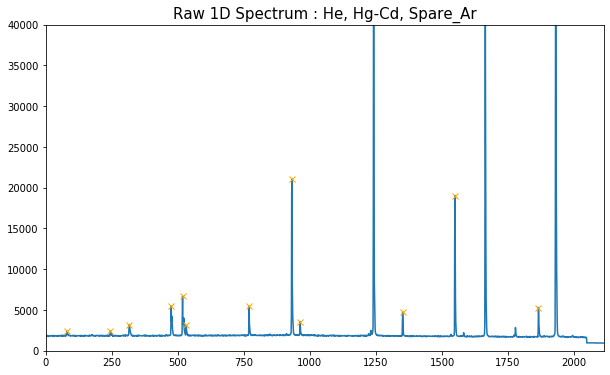

In [92]:
plt.figure(figsize = (10,6))
plt.title("Raw 1D Spectrum : He, Hg-Cd, Spare_Ar", fontsize=15)
plt.xlim(0,2112)
plt.ylim(0,40000)
plt.plot(arc_x, arc_spectrum)
plt.plot(line_xpos, line_vals, "x", color='orange')

# Assign Wavelengths

In [99]:
line_wv = [3261.05, 3403.65, 3466.55, 3610.51, 3650.15,
          3662.88, 3888.65, 4046.56, 4077.83, 4471.50,
          4678.16, 5015.68]

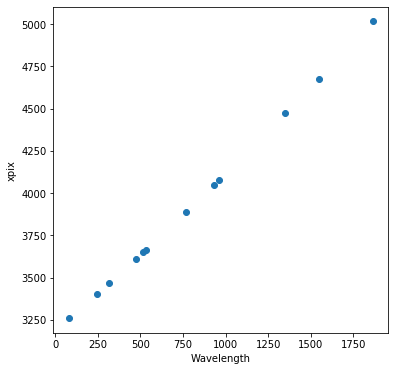

In [107]:
plt.figure(figsize=(6,6))
plt.xlabel("Wavelength")
plt.ylabel("xpix")
plt.scatter(line_xpos, line_wv)

# Create Wavelength Solution

In [141]:
def find_wv_soln(line_x, line_wave, order=3):
    wv_soln = np.polyfit(line_x, line_wave, deg=order)
    
    #poly_form = np.poly1d(wv_soln)
    
    
    return wv_soln

In [144]:
def apply_wv_soln(x_array, line_x, line_wave, order=3):
    
    wv_soln = find_wv_soln(line_x, line_wave, order=order)
    
    poly_form = np.poly1d(wv_soln)
    wave_array = poly_form(x_array)
    
    #print(poly_form(x_array)[1000])
    #print(x_array)
    #print(wave_array)
    
    plt.figure(figsize=(6,6))
    plt.xlabel("xpix")
    plt.ylabel(("wv"))
    plt.plot(x_array, wave_array, color='black', label = 'poly fit')
    plt.scatter(line_x, line_wave, color='red', marker='d', label='arc data')
    plt.legend()
    return wave_array

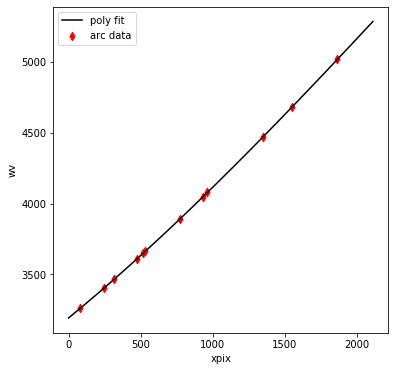

In [146]:
wave_cal = apply_wv_soln(arc_x, line_xpos, line_wv)

# Plot Solar Spectrum

In [147]:
raw_sol = glob.glob("solar_spectrum.fits")[0]

sol_file = fits.open(raw_sol)
sol_data = sol_file[0].data.astype(float)
sol_file.close()

sol_spectrum = sol_data[0:-1][160]
sol_x = np.arange(0, len(arc_spectrum))

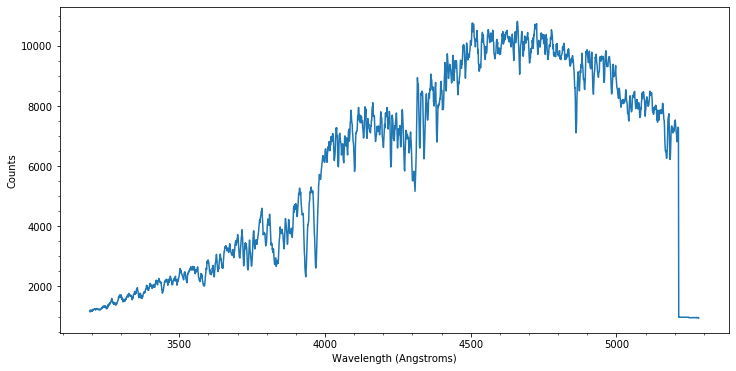

In [158]:
plt.figure(figsize=(12,6))
plt.minorticks_on()
plt.xlabel("Wavelength (Angstroms)")
plt.ylabel("Counts")
plt.plot(wave_cal, sol_spectrum)